# 2018 in Review from articles written in a major Urdu website


In [0]:
# install library
!pip install git+https://git@github.com/kavgan/word_cloud.git

  Cloning https://git@github.com/kavgan/word_cloud.git to /tmp/pip-req-build-wcok391r
    100% |████████████████████████████████| 12.4MB 2.7MB/s 
    100% |████████████████████████████████| 24.5MB 1.2MB/s 
  Running setup.py bdist_wheel for word-cloud ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-b1afb1ct/wheels/d6/98/5f/8e001af2b4fb7852176a75f82de076b6515ee0fd298416fd01
Successfully built word-cloud
yellowbrick 0.9 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.20.3 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
  Fo

In [0]:
# imports
from word_cloud.word_cloud_generator import WordCloud
from IPython.core.display import HTML
from nltk.corpus import reuters
import nltk
import pandas as pd
from nltk.collocations import *
nltk.download("stopwords")
import pandas as pd
import io
import requests
from matplotlib import pyplot as plt
import numpy as np
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data

#### Stop Words

In [0]:
# read file for stop words
url="https://raw.githubusercontent.com/stopwords-iso/stopwords-ur/master/stopwords-ur.txt"
s=requests.get(url).content
c=pd.read_fwf(io.StringIO(s.decode('utf-8')))


In [0]:
stopwords = c["آئی"].tolist()+["آئی"]
stopwords_ur = stopwords

#### Read Data File

In [0]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
with open('/content/gdrive/My Drive/Output.txt', 'r') as f:
  data = f.read()
# a correction
data = data.replace("mar","")

### Preprocessing

#### Remove Punctuation 

In [0]:
print("Data have ",len(data)," chars before remvoing punctuation.")
for p in string.punctuation:
  data = data.replace(p,"")
print("Data have ",len(data)," chars after remvoing punctuation.")


Data have  12168176  chars before remvoing punctuation.
Data have  12099848  chars after remvoing punctuation.


#### String to List of words

In [0]:
words = data.split("\n")

## Generate word clouds from Unigrams

In [0]:
# some stop words made based on trail and error
stopwords = stopwords + ["کردیا","کیا","بات","گا","جانب","مطابق","کmar","اب","ٹی ","پی","ایم","انہوں","ئی","اب","ٹی","ایم","انہوں","کہنا","گیا","جاری","بتایا"
                         ,"تھا","ایس","اس","روز","حوالے","باد","تاہم","متعلق","نہیں","کردی","ایف","شروع","واضح","بی","ہوگا","10","سمیت","گزشتہ","دیگر","ان"
                         ,"none","ڈی","دیا","موجود","این","جی","کامیابfeb","چاہیے","باعث","ایل","کرکے"]
#
wc=WordCloud(use_tfidf=False,stopwords=stopwords)

#don't randomize color, show only top 50
embed_code=wc.get_embed_code(text=words,random_color=False,topn=100)
HTML(embed_code)

### Explore other options in UniGram Word Cloud

In [0]:
embed_code=wc.get_embed_code(text=words,random_color=True,topn=50)
HTML(embed_code)

In [0]:
wc=WordCloud(use_tfidf=True,stopwords=stopwords)
embed_code=wc.get_embed_code(text=words,random_color=True,topn=50)
HTML(embed_code)

## Bigram Word cloud

In [0]:
bgm    = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)
scored = finder.score_ngrams( bgm.likelihood_ratio  )

In [0]:
# trial and error based stopwords to have clean word cloud

sw = ["Geo Television","Television","Network","None-None","ٹی آئی","Rights Reserved",
              "All Rights","7 وکٹوں","کردار ادا","کیو ایم","2018 at","shared by","2018 at","ہے۔ان کہنا","post shared","ایس ایل","Television Network",
      "None None","ایم-کیو","کامیاب","Mar15پشاور 44","کامیابMar08کوئٹہ 67","کامیابMar10کراچی 63","کامیابFeb24پشاور 34"
      ,"پی ٹی","ایس پی","ایم کیو","جیو نیوز","ذمہ داری"
      
     ]

# make a list of most occuring bigram words with frequency as weights
lis = []
scr = []
for big_words,score in scored[:200]:
  big_words = list(big_words)
  big_words = big_words[0]+' '+big_words[1]
  if big_words in sw:
    pass
  else:
    scr.append(score)
    lis.append([big_words ,score/43127.1411271865])

In [0]:
lis = lis[:100]

In [0]:

wc=WordCloud(use_tfidf=False,stopwords=sw)

#words with corresponding weights
list_of_scores=lis[:50]
embed_code=wc.get_embed_code(text_scores=pd.DataFrame(list_of_scores),random_color=False,topn=50)
HTML(embed_code)

## Trigram

In [0]:
tgm    = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(words)
scored = finder.score_ngrams( tgm.likelihood_ratio)

In [0]:
#sw = ["Geo Television","Television","Network","None-None","ٹی آئی","Rights Reserved",
#              "All Rights","7 وکٹوں","کردار ادا","کیو ایم","2018 at","shared by","2018 at","ہے۔ان کہنا","post shared","ایس ایل","Television Network",
#      "None None","ایم-کیو","کامیاب","Mar15پشاور 44","کامیابMar08کوئٹہ 67","کامیابMar10کراچی 63","کامیابFeb24پشاور 34"
#      ,"پی ٹی"
      
#     ]
sw = []
lis = []
scr = []
for tig_words,score in scored[:200]:
  tig_words = list(tig_words)
  tig_words = tig_words[0]+' '+tig_words[1]+' '+tig_words[2]
  if big_words in sw:
    pass
  else:
    scr.append(score)
    lis.append([tig_words ,score])

In [0]:
# to normailze weights
lis = lis[:100]
scr = scr[:100]
for i in range(len(lis)):

  lis[i][1] = lis[i][1]/np.max(scr)

In [0]:

wc=WordCloud(use_tfidf=False,stopwords=sw)

#words with corresponding weights
list_of_scores=lis[:50]
embed_code=wc.get_embed_code(text_scores=pd.DataFrame(list_of_scores),random_color=False,topn=50)
HTML(embed_code)

## NLTK Based Ananlysis

In [0]:
text = nltk.Text(words)

In [0]:
text.concordance('شریف')

Displaying 25 of 7321 matches:
ماجی رابطے سائٹ ٹوئٹر ٹوئٹ عمران خان شریف برادران قوم لوٹی دولت بچانے ملکی رہن
گیشن ٹیم تشکیل رپورٹ وزیراعلیٰ شہباز شریف وزیر قانون پنجاب رانا ثناءاللہ خان گ
انڈر تھے۔ +None +سابق وزیر اعظم نواز شریف صاحبزادی مریم نواز کہنا کیسی اہلی مل
ز کہنا کیسی اہلی ملک ساری سیاست نواز شریف گرد گھوم ہے۔لاہور تقریب خطاب مریم نو
عوام حقوق تحفظ حقوق واپس دلواتے نواز شریف خوف سازشیوں مخالفین دن رات کھائے ہے۔
 رہنما کیسی اہلی ملک ساری سیاست نواز شریف گرد گھوم نواز شریف خوف اتحاد ٹوٹ ہیں
ک ساری سیاست نواز شریف گرد گھوم نواز شریف خوف اتحاد ٹوٹ ہیں۔ان کہنا کیسی نااہل
ے، عمران خان چار سال رو (ن) لیگ نواز شریف بڑھیں رونا تیز جائیگا۔مریم نواز کہنا
مران خان بہتر جانتی ہے۔انہوں کہ نواز شریف تین نسلوں چیزیں کھنگال لیکن عدالتی ک
وچھے سر چوٹ بھول گیا۔ان کہنا کہ نواز شریف لوڈشیڈنگ وعدہ اور نواز شریف وعدے پور
 کہ نواز شریف لوڈشیڈنگ وعدہ اور نواز شریف وعدے پورے کیے۔رہنما مسلم لیگ (ن)نے ک
ورے کیے۔رہنما مسلم لیگ (ن)نے کہ نواز شریف 10 ہزار کلومیٹر سڑکوں کاجال بچھایا ا
انہوں نوازشریف 2018 ا

In [0]:
text.collocations(50)

عمران خان; نواز شریف; تحریک انصاف; سپریم کورٹ; مسلم لیگ; چیف جسٹس;
+اسلام آباد:; لیگ (ن); دہشت گردی; پیپلز پارٹی; ثاقب نثار; راؤ انوار;
ایون فیلڈ; مریم نواز; سوشل میڈیا; شہباز شریف; خاقان عباسی; احتساب
عدالت; شاہد خاقان; قومی اسمبلی; الیکشن کمیشن; جاں بحق; اسلام آباد; کیو
ایم; کاغذات نامزدگی; سابق وزیراعظم; ڈونلڈ ٹرمپ; اسلام آباد; +None
+None; فاروق ستار; پریس کانفرنس; ایم کیو; اسحاق ڈار; +اسلام آباد:;
سعودی عرب; اسٹیل ملز; post shared; منی لانڈرنگ; گزشتہ روز; دہشت گردوں;
ذمہ داری; جیو نیوز; ارب روپے; عام انتخابات; نقیب اللہ; بلاول بھٹو;
محمود قریشی; پرویز مشرف; خیبر پختونخوا; کیپٹن (ر)


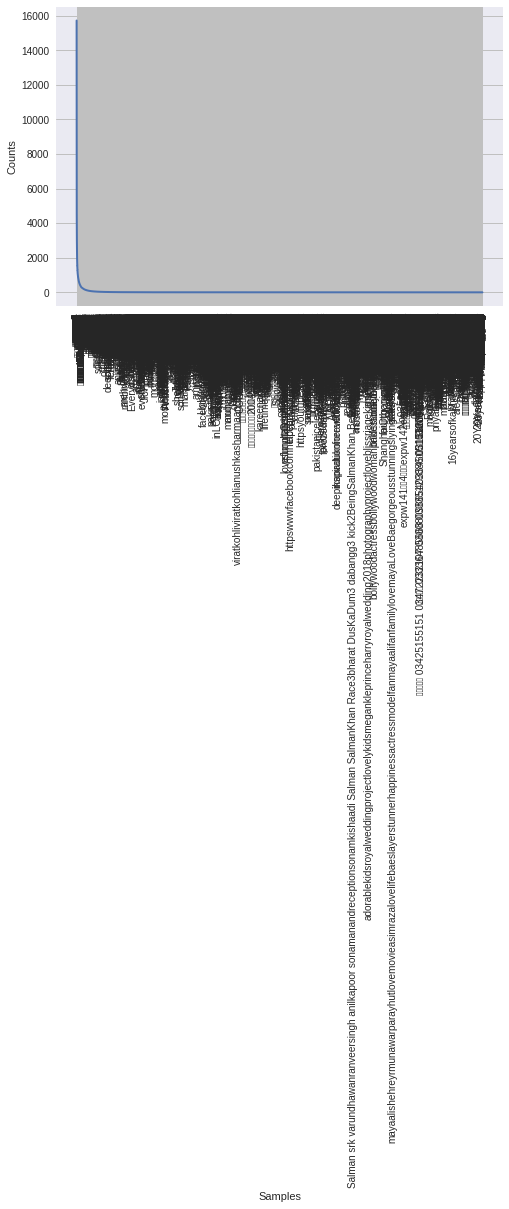

In [0]:
freqdist1 = nltk.FreqDist(words)
freqdist1.plot()

## Other Article Stats

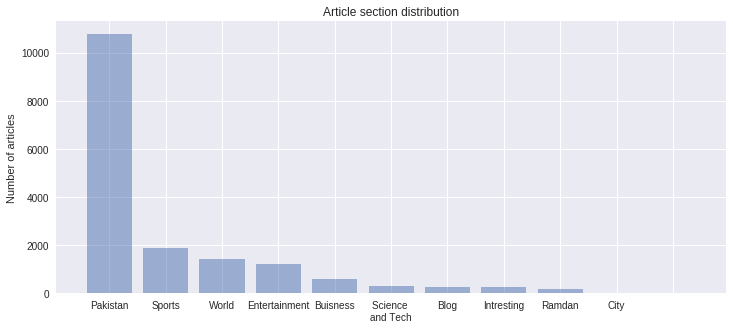

In [0]:
count = [10763, 1865, 1422, 1211, 592, 307, 273, 243, 155, 12, 10]
sec_name_en = ['Pakistan','Sports','World','Entertainment','Buisness','Science \nand Tech','Blog','Intresting', 'Ramdan','City']    

y_pos = np.arange(len(count))
plt.figure(figsize=(12,5))
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, sec_name_en)
plt.ylabel('Number of articles')
plt.title('Article section distribution')
 
plt.show()

#### Word cloud for Tags used in each article

In [0]:
# read file for stop words
url="https://raw.githubusercontent.com/awaisrauf/text/master/tags_2018.txt"
tg=requests.get(url).content
tags=pd.read_fwf(io.StringIO(tg.decode('utf-8')))

In [0]:
tags_list = tags["Chairman Nab"].tolist()

In [0]:
wc=WordCloud(use_tfidf=False,stopwords=stopwords)

#don't randomize color, show only top 50
embed_code=wc.get_embed_code(text=tags_list,random_color=False,topn=100)
HTML(embed_code)

### Word cloud for Headlines

In [0]:
# read file for stop words
url="https://raw.githubusercontent.com/awaisrauf/text/master/headline_2018.txt"
hl=requests.get(url).content
headlines=pd.read_fwf(io.StringIO(hl.decode('utf-8')))


In [0]:
headline_list = headlines["headlineچیئرمین نیب نے گوادر انڈسٹریل ڈیولپمنٹ اتھارٹی میں بے ضابطگیوں کا نوٹس لے لیا"].tolist()

In [0]:
stopwords_ur = stopwords_ur +["میں","اے","کردی","سے","نے","بھی","کرلیا","بعد","کیا"] +["کردیا","کیا","بات","گا","جانب","مطابق","کmar","اب","ٹی ","پی","ایم","انہوں","ئی","اب","ٹی","ایم","انہوں","کہنا","گیا","جاری","بتایا"
                         ,"تھا","ایس","اس","روز","حوالے","باد","تاہم","متعلق","نہیں","کردی","ایف","شروع","واضح","بی","ہوگا","10","سمیت","گزشتہ","دیگر","ان"
                         ,"none","ڈی","دیا","موجود","این","جی","کامیابfeb","چاہیے","باعث","ایل","کرکے","کا","کو","لیا"
                         ,"پیش","ہونے","کر","لیے","بنانے","دینے","ساتھ" , "سب","مزید","والی","سی","مزید","پہلے","مزید","پہنچ","پہلے","مزید"]
wc=WordCloud(use_tfidf=False,stopwords=stopwords_ur)

#don't randomize color, show only top 50
embed_code=wc.get_embed_code(text=headline_list,random_color=False,topn=100)
HTML(embed_code)

### Months Distribution

In [0]:
months = [[' جنوری', 1628],
 [' اکتوبر', 1550],
 [' مئی', 1526],
 [' اپریل', 1500],
 [' جولائی', 1418],
 [' مارچ', 1415],
 [' نومبر', 1374],
 [' جون', 1324],
 [' ستمبر', 1288],
 [' فروری', 1224],
 [' اگست', 1199],
 [' دسمبر', 753]]

counts = []
names = []
for name,count in months:
  counts.append(count)
  names.append(name)

Text(0.5,1,'Articles published in each month')

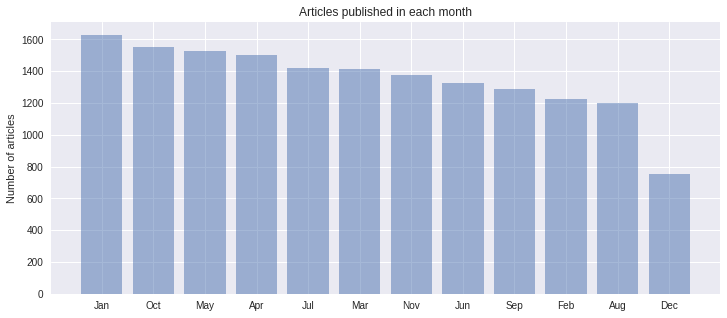

In [0]:
names = ["Jan","Oct","May","Apr","Jul","Mar","Nov","Jun","Sep","Feb","Aug","Dec"]
y_pos = np.arange(len(counts))
plt.figure(figsize=(12,5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.ylabel('Number of articles')
plt.title('Articles published in each month')

### Authors Stats

In [0]:
# read file for stop words
url="https://raw.githubusercontent.com/awaisrauf/text/master/authors_2018.txt"
aut=requests.get(url).content
authors=pd.read_fwf(io.StringIO(aut.decode('utf-8')))

In [0]:
authors_list = authors["@ویب ڈیسک"].tolist()
from collections import Counter
counts = Counter(authors_list)
ss = counts.most_common()

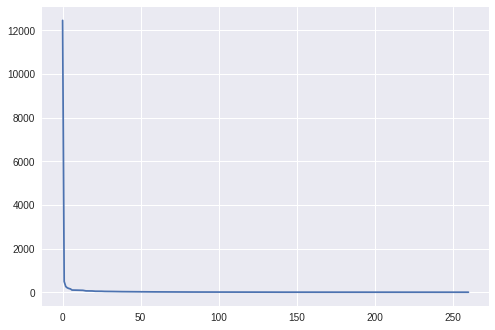

In [0]:
cnt  = []
for i in range(len(ss)):
  cnt.append(ss[i][1])
plt.plot(cnt)  